 
Github Username: Asma-571
USC ID:5168462498

### Combined Cycle Power Plant Data Set Problem

**1. Combined Cycle Power Plant Data Set**  
  
The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of **hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V)** to predict the **net hourly electrical energy output (EP)** of the plant.

Preamble on data:  
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.

<font size="4" color="red">(b) Exploring the data:</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from prettytable import PrettyTable
from scipy import stats
from IPython.display import display, Markdown
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="<package_name>")

In [2]:
df = pd.read_excel("./CCPP/Folds5x2_pp.xlsx", sheet_name="Sheet1")
# df AT:   ,V:Exhaust Vacuum (V), AP:Ambient Pressure (AP), Relative Humidity (RH) , energy output (EP)
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [3]:
df.shape

(9568, 5)

<font size="4" color="red"> (b) i. How many rows are in this data set? How many columns? What do the rows
and columns represent? </font>

In [4]:
rows, col = len(df), len(df.columns)
print("Number of rows in the dataset = {}\nNumber of columns in the dataset = {}".format(rows,col))

Number of rows in the dataset = 9568
Number of columns in the dataset = 5


In [5]:
print("Column names:", df.columns)

Column names: Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


<font size="4" color="blue">Modifying the features& label names to to improve readability</font>

In [6]:
new_list_names = {'AT': 'Ambient Temperature','V':'Exhaust Vacuum', 'AP':'Ambient Pressure','RH':'Relative Humidity','EP':'Energy Output'}
df.columns = new_list_names
df.columns

Index(['AT', 'V', 'AP', 'RH', 'EP'], dtype='object')

<font size="4" color="red"> (b)ii. Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.</font>

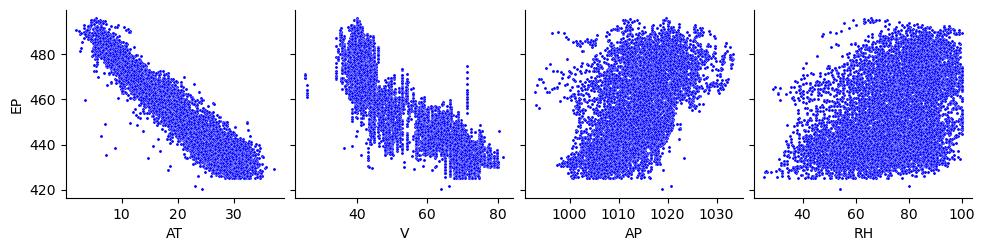

In [7]:
sns.pairplot(df, x_vars=['AT', 'V', 'AP', 'RH'], y_vars='EP', plot_kws={'s': 5,'color': 'blue'})
plt.show()

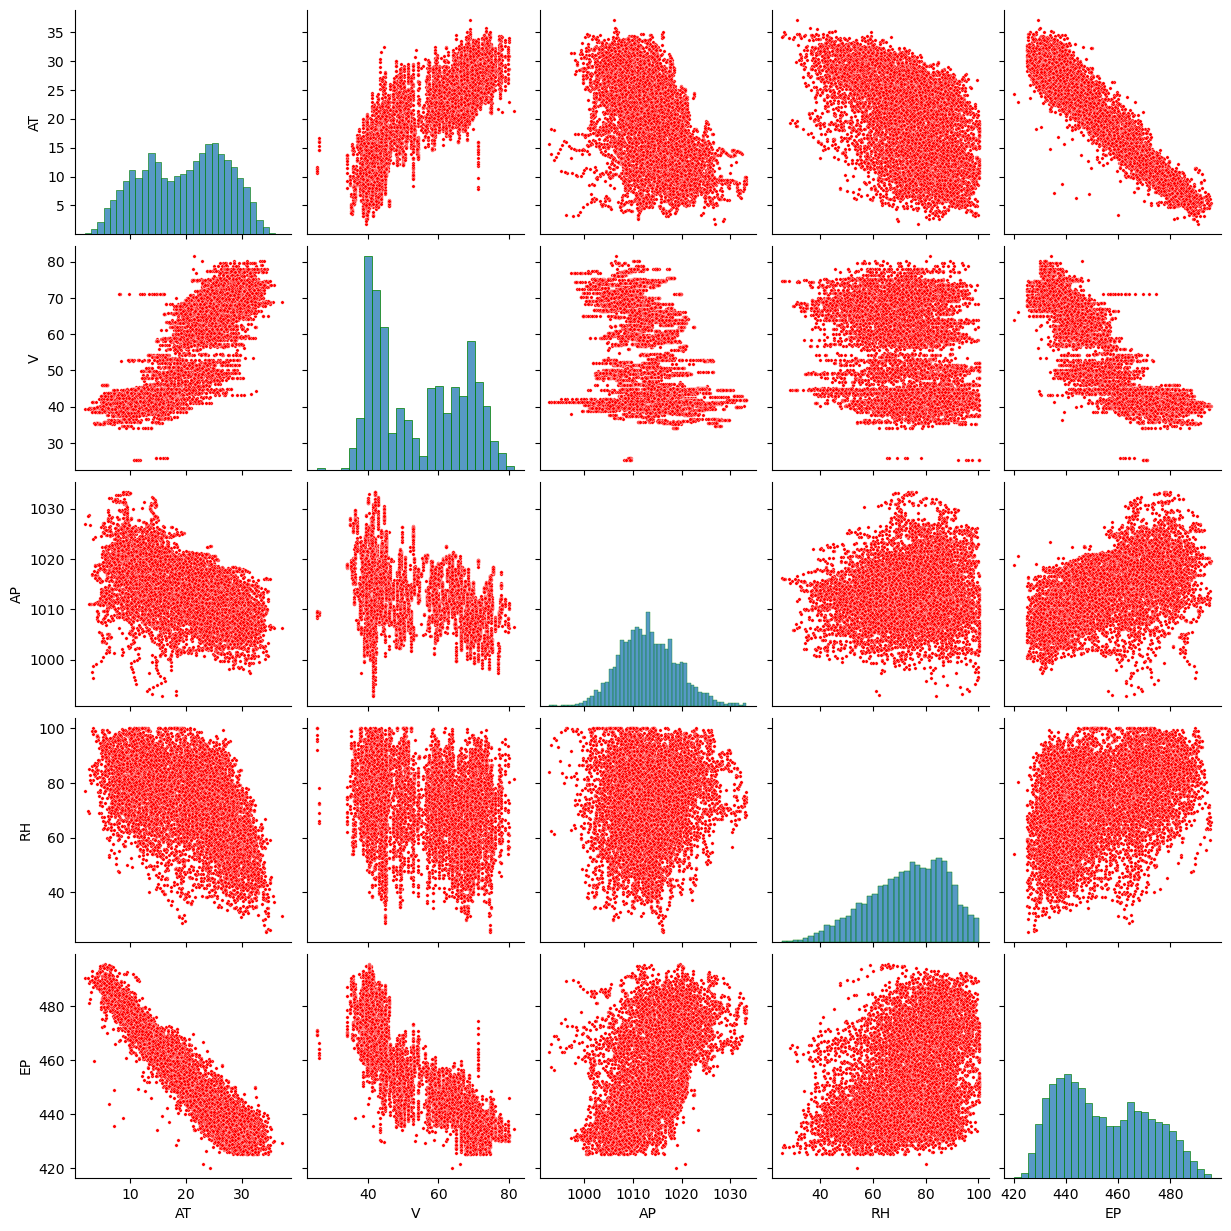

In [8]:
sns.pairplot(df,plot_kws={'s': 6,'color': 'red'},diag_kws={'edgecolor':'green'})
plt.show()

<font size="4" color="red"> (b) iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table

In [9]:
#mean, min, 25%, 50%,75%, max
#mean, (meadin,50%), (range= max-min), first quart(25%),(third quartile = 75%) (#interquartile range ='third quartile'-'first quartile'),


In [10]:
statistics_df = df.describe()
renamed_df = statistics_df.rename(index={'50%':'median', '25%':'first quartile', '75%':'third quartile'})
cleaned_df = renamed_df.drop(['count','std'], axis=0)
summarized_stats = cleaned_df
summarized_stats

,AT,V,AP,RH,EP
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
min,1.810000,25.360000,992.890000,25.560000,420.260000
first quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
median,20.345000,52.080000,1012.940000,74.975000,451.550000
third quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [11]:
summarized_stats.loc["range"] = summarized_stats.loc['max']- summarized_stats.loc['min']
summarized_stats.loc["interquartile_range"] = summarized_stats.loc['third quartile']- summarized_stats.loc['first quartile']
summarized_stats

,AT,V,AP,RH,EP
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
min,1.810000,25.360000,992.890000,25.560000,420.260000
first quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
median,20.345000,52.080000,1012.940000,74.975000,451.550000
third quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000
interquartile_range,12.210000,24.800000,8.160000,21.502500,28.680000


In [12]:
summarized_stats = summarized_stats.drop(['min','max'], axis=0)
summarized_stats

,AT,V,AP,RH,EP
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
first quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
median,20.345000,52.080000,1012.940000,74.975000,451.550000
third quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
range,35.300000,56.200000,40.410000,74.600000,75.500000
interquartile_range,12.210000,24.800000,8.160000,21.502500,28.680000


In [13]:
# summarized_stats.iloc[0]
row_labels = summarized_stats.index
cc = summarized_stats.columns
row_labels

Index(['mean', 'first quartile', 'median', 'third quartile', 'range',
       'interquartile_range'],
      dtype='object')

In [14]:
new_index = ['mean','median','range','first quartile','third quartile','interquartile_range']
summarized_stats = summarized_stats.reindex(new_index)
summarized_stats

,AT,V,AP,RH,EP
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
range,35.300000,56.200000,40.410000,74.600000,75.500000
first quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
third quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
interquartile_range,12.210000,24.800000,8.160000,21.502500,28.680000


<font size="5" color="red">(c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks? </font>



<font size="3" color = 'blue'>The decision about removing or keeping outliers depends on a variety of factors. In this problem I will use both of the following methods:
1- comparing the regression results with and without outliers.
2- using residual plots to assess the influence of outliers.<font>


<font size="2" color="blue"> Method 1 : Fitting a series of simple linear regression models, 
 where each model is fit using a single predictor using LinearRegression() model</font>


In [15]:

predictors = df.columns[:-1]
label = df['EP']

results = []
for predictor in predictors:
    X = df[[predictor]]
    y = label
    model = LinearRegression().fit(X, y)
    results.append({'Predictor': predictor, 
                    'Intercept': model.intercept_, 
                    'Coefficient': model.coef_[0]})
table = PrettyTable()
table.field_names = ['Predictor', 'Intercept', 'Coefficient']

for r in results:
    table.add_row([r['Predictor'], r['Intercept'], r['Coefficient']])

print(table)

+-----------+--------------------+---------------------+
| Predictor |     Intercept      |     Coefficient     |
+-----------+--------------------+---------------------+
|     AT    | 497.0341198927667  |  -2.171319958517791 |
|     V     | 517.8015263083859  | -1.1681351265557116 |
|     AP    | -1055.260988984442 |  1.4898716733991164 |
|     RH    | 420.96176615548393 | 0.45565010226297986 |
+-----------+--------------------+---------------------+



<font size="2" color="blue">Ploting all the simple linear regression models, 
 in a 2x2 plot grid</font>


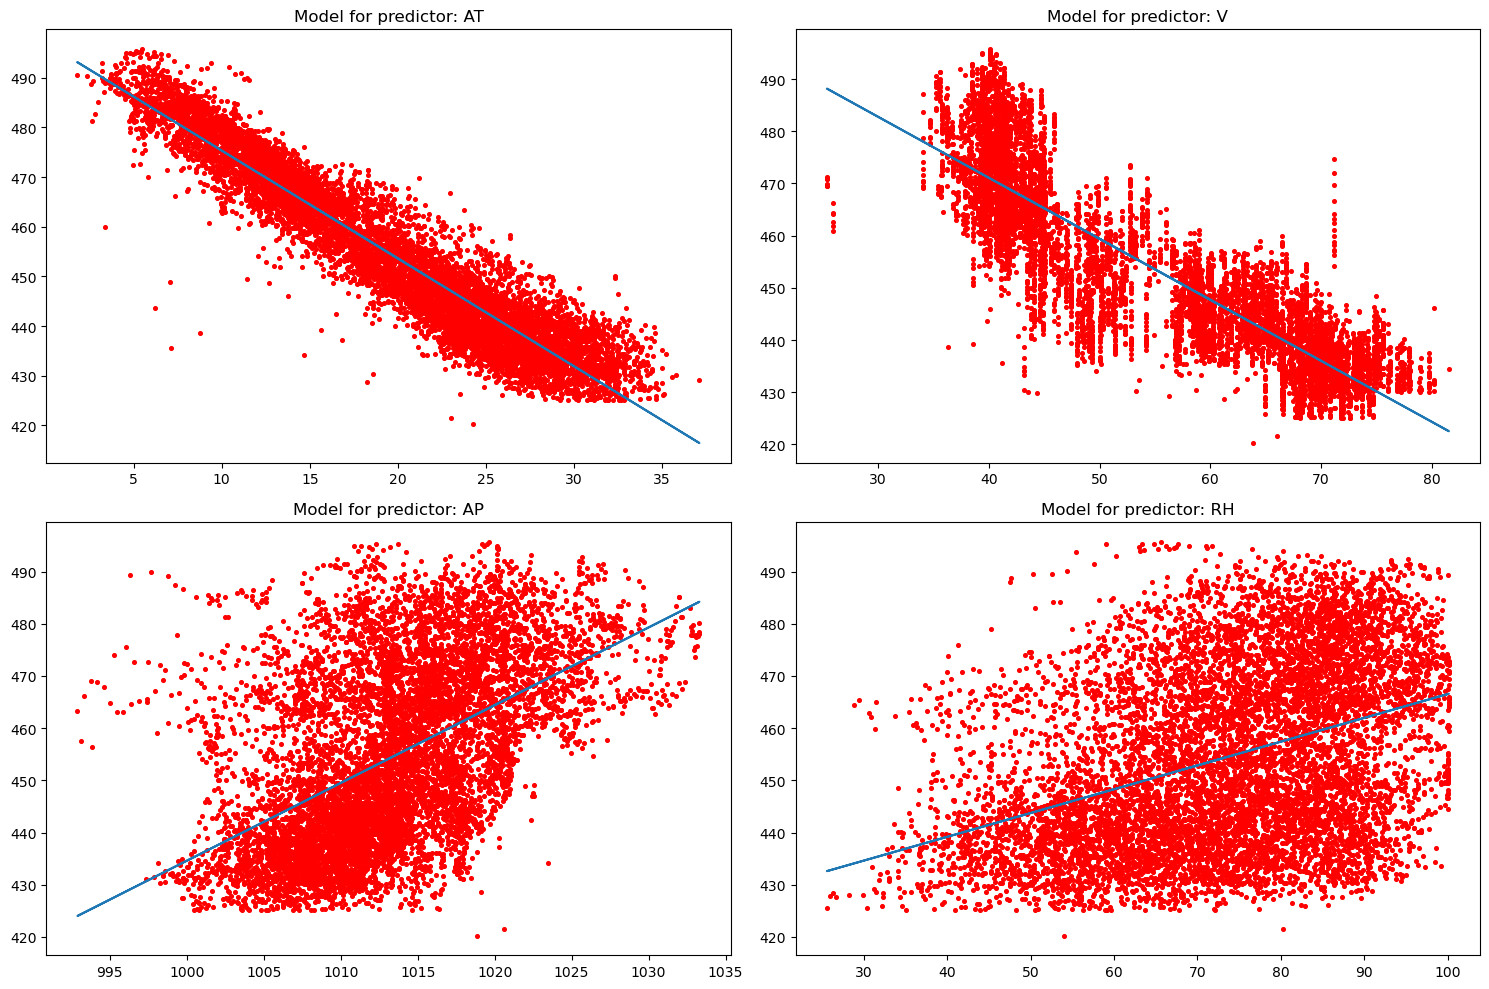

In [16]:
predictors =df.columns[:-1]
predictors = df.columns[:-1]
label = df['EP']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

index = 0
for predictor in predictors:
    X = df[[predictor]]
    y = label
    model = LinearRegression().fit(X, y)
    
    axs[index].scatter(X, y, s=7, c='red')
    axs[index].plot(X, model.predict(X))
    axs[index].set_title("Model for predictor: " + predictor)
    index += 1
    
plt.tight_layout()
plt.show()


<hr style="border-top: 4px solid gray">



<font size="2" color="blue"> Method 2 : Fitting a series of simple linear regression models, 
 where each model is fit using a single predictor using the statsmodels library</font>


In [17]:
predictors = df.columns[:-1]
label = df['EP']
models = []
# store all the models in models = []
for predictor in predictors:
    X = df[[predictor]]
    X = sm.add_constant(X)
    y = label
    model = sm.OLS(endog=y, exog=X).fit()
    models.append(model)
df_copy = df.copy()

residuals = models[0].resid
z = np.abs(stats.zscore(residuals))
threshold = 3
outliers0 = np.where(z > threshold)
df_without_outliers = df_copy.drop(df_copy.index[outliers0[0]])



X2 = df_without_outliers[['AT']]
label = df_without_outliers['EP']
X2 = sm.add_constant(X2)
y1 = label
model0_without_outliers = sm.OLS(endog=y1, exog=X2).fit()


model1_summary = models[0].summary().as_text()
model2_summary = model0_without_outliers.summary().as_text()


display(Markdown("### Model 1 Summary:"))
display(Markdown(f"```\n{model1_summary}\n```"))

display(Markdown("### Model without outliers Summary:"))
display(Markdown(f"```\n{model2_summary}\n```"))

### Model 1 Summary:

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:38   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

### Model without outliers Summary:

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 9.220e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:38   Log-Likelihood:                -29252.
No. Observations:                9526   AIC:                         5.851e+04
Df Residuals:                    9524   BIC:                         5.852e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.2292      0.151   3294.842      0.000     496.933     497.525
AT            -2.1802      0.007   -303.652      0.000      -2.194      -2.166
==============================================================================
Omnibus:                       16.218   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.711
Skew:                           0.021   Prob(JB):                      0.00105
Kurtosis:                       2.819   Cond. No.                         59.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

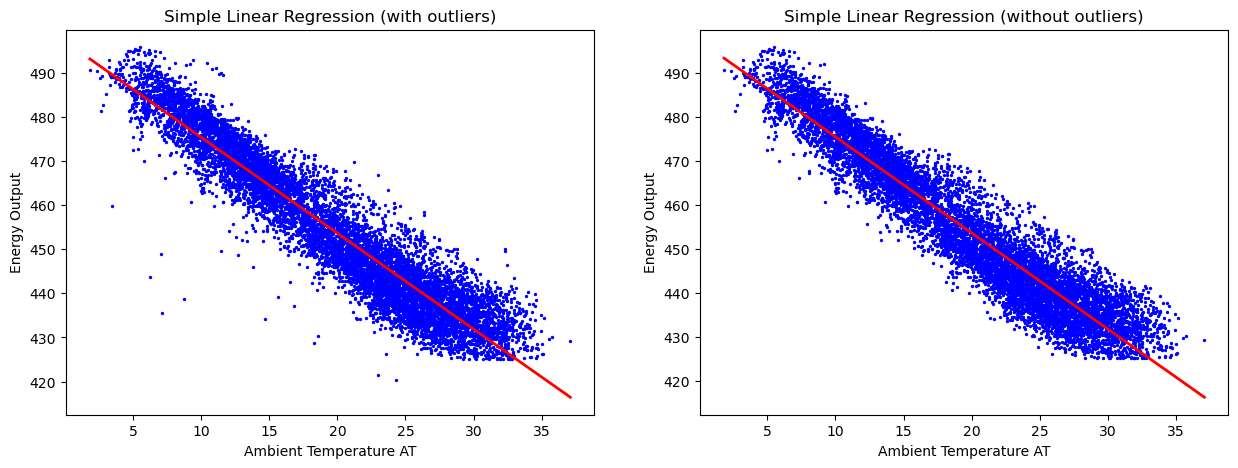

In [18]:

x_linspace = np.linspace(df_copy['AT'].min(), df_copy['AT'].max(), 100)
x_linspace = sm.add_constant(x_linspace)
y_pred = models[0].predict(x_linspace)


xx_linspace = np.linspace(df_without_outliers['AT'].min(), df_without_outliers['AT'].max(), 100)
xx_linspace = sm.add_constant(xx_linspace)
yy_pred = model0_without_outliers.predict(xx_linspace)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


ax1.scatter(df_copy['AT'], y, color='blue',s=2)
ax1.plot(x_linspace[:, 1], y_pred, color='red', linewidth=2)
ax1.set_xlabel('Ambient Temperature AT')
ax1.set_ylabel('Energy Output')
ax1.set_title('Simple Linear Regression (with outliers)')


ax2.scatter(df_without_outliers['AT'], df_without_outliers['EP'], color='blue',s=2)
ax2.plot(xx_linspace[:, 1], yy_pred, color='red', linewidth=2)
ax2.set_xlabel('Ambient Temperature AT')
ax2.set_ylabel('Energy Output')
ax2.set_title('Simple Linear Regression (without outliers)')


plt.show()


<font color= 'blue'>To determine if there is a statistically significant association between the predictor and response, you can look at the t-values of  the model summary. The high absolute t-value  presented above indicates a significant association between the predictor and response.
However R-squared suggests that the model is a poor fit.<font>

<font color = 'blue'>Another way to determine that is by looking at p_value of t.


In [19]:
# calculate the correlation matrix of the independent variables
df[['AT','V','AP','RH']].corr()

,AT,V,AP,RH
AT,1.000000,0.844107,-0.507549,-0.542535
V,0.844107,1.000000,-0.413502,-0.312187
AP,-0.507549,-0.413502,1.000000,0.099574
RH,-0.542535,-0.312187,0.099574,1.000000


A Multicollinearity problrm might be present between AT and V

In [20]:
test_results = models[0].t_test([0, 1])
t_statistic = test_results.tvalue[0]
p_value = test_results.pvalue.item()
p_value
if p_value < 0.05:
    print("The relationship is statistically significant with a p-value of", p_value)
else:
    print("The relationship is not statistically significant with a p-value of", p_value)


The relationship is statistically significant with a p-value of 0.0


<font color = 'blue'> it suggests that the independent variable has a significant effect on the dependent variable since the p-value is less than the significance level (e.g., 0.05)

<font color = 'blue'>In addition, the coefficient is observed to be well-estimated since it has a small standard error and compared to the corresponding t-statistic as well .

In [21]:
# # Get the influence statistics
# influence = models[0].get_influence()

# # Get the studentized residuals
# studentized_residuals = influence.resid_studentized_internal

# # Get the outliers based on studentized residuals
# outliers = np.where(abs(studentized_residuals) > 3)[0]

It is important to interpret the results of an OLS regression analysis carefully 

<hr style="border-top: 4px solid gray">


In [22]:
df_copy = df.copy()
residuals = models[1].resid
z = np.abs(stats.zscore(residuals))

threshold = 3
outliers0 = np.where(z > threshold)
df_without_outliers = df_copy.drop(df_copy.index[outliers0[0]])
X2 = df_without_outliers[['V']]
label = df_without_outliers['EP']
X2 = sm.add_constant(X2)
y1 = label
model1_without_outliers = sm.OLS(endog=y1, exog=X2).fit()
model1_summary = models[1].summary().as_text()
model2_summary = model1_without_outliers.summary().as_text()
display(Markdown("### Model 1 Summary:"))
display(Markdown(f"```\n{model1_summary}\n```"))
display(Markdown("### Model without outliers Summary:"))
display(Markdown(f"```\n{model2_summary}\n```"))

### Model 1 Summary:

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:39   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

### Model without outliers Summary:

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 3.138e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:39   Log-Likelihood:                -33637.
No. Observations:                9535   AIC:                         6.728e+04
Df Residuals:                    9533   BIC:                         6.729e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        518.3232      0.371   1398.518      0.000     517.597     519.050
V             -1.1769      0.007   -177.142      0.000      -1.190      -1.164
==============================================================================
Omnibus:                        8.804   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.925
Skew:                          -0.061   Prob(JB):                       0.0115
Kurtosis:                       3.088   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

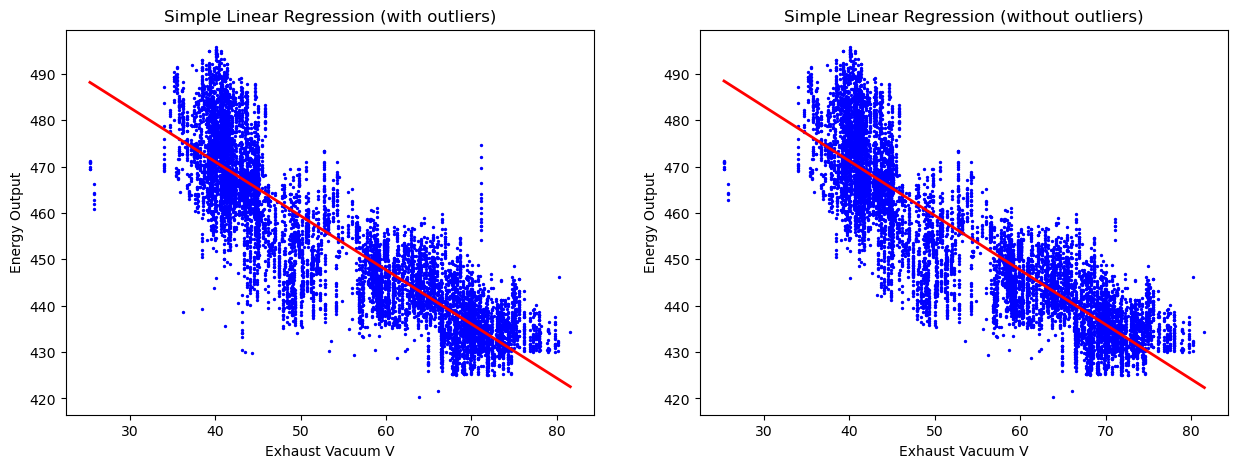

In [23]:
x_linspace = np.linspace(df_copy['V'].min(), df_copy['V'].max(), 100)
x_linspace = sm.add_constant(x_linspace)
y_pred = models[1].predict(x_linspace)
xx_linspace = np.linspace(df_without_outliers['V'].min(), df_without_outliers['V'].max(), 100)
xx_linspace = sm.add_constant(xx_linspace)
yy_pred = model1_without_outliers.predict(xx_linspace)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(df_copy['V'], y, color='blue',s=2)
ax1.plot(x_linspace[:, 1], y_pred, color='red', linewidth=2)
ax1.set_xlabel('Exhaust Vacuum V')
ax1.set_ylabel('Energy Output')
ax1.set_title('Simple Linear Regression (with outliers)')
ax2.scatter(df_without_outliers['V'], df_without_outliers['EP'], color='blue',s=2)
ax2.plot(xx_linspace[:, 1], yy_pred, color='red', linewidth=2)
ax2.set_xlabel('Exhaust Vacuum V')
ax2.set_ylabel('Energy Output')
ax2.set_title('Simple Linear Regression (without outliers)')
plt.show()


<font color='blue'>  The high absolute t-value  presented above indicates a significant association between the predictor and response.

In [24]:
test_results = models[1].t_test([0, 1])
t_statistic = test_results.tvalue[0]
p_value = test_results.pvalue.item()
p_value
if p_value < 0.05:
    print("The relationship is statistically significant with a p-value of", p_value)
else:
    print("The relationship is not statistically significant with a p-value of", p_value)


The relationship is statistically significant with a p-value of 0.0


<font color= 'blue'>To determine if there is a statistically significant association between the predictor and response, you can look at the t-values of  the model summary. The high absolute t-value  presented above indicates a significant association between the predictor and response. <font>

<font color = 'blue'>Another way to determine that is by looking at p_value of t.


<hr style="border-top: 4px solid gray">


In [25]:
df_copy = df.copy()
residuals = models[2].resid
z = np.abs(stats.zscore(residuals))
threshold = 3
outliers0 = np.where(z > threshold)
df_without_outliers = df_copy.drop(df_copy.index[outliers0[0]])
X2 = df_without_outliers[['AP']]
label = df_without_outliers['EP']
X2 = sm.add_constant(X2)
y1 = label
model2_without_outliers = sm.OLS(endog=y1, exog=X2).fit()
model1_summary = models[2].summary().as_text()
model2_summary = model2_without_outliers.summary().as_text()
display(Markdown("### Model 1 Summary:"))
display(Markdown(f"```\n{model1_summary}\n```"))

display(Markdown("### Model without outliers Summary:"))
display(Markdown(f"```\n{model2_summary}\n```"))

### Model 1 Summary:

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:39   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
```

### Model without outliers Summary:

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     3808.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:39   Log-Likelihood:                -38967.
No. Observations:                9540   AIC:                         7.794e+04
Df Residuals:                    9538   BIC:                         7.795e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1102.4899     25.229    -43.699      0.000   -1151.945   -1053.035
AP             1.5363      0.025     61.705      0.000       1.488       1.585
==============================================================================
Omnibus:                      494.510   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.972
Skew:                           0.571   Prob(JB):                    3.76e-120
Kurtosis:                       2.717   Cond. No.                     1.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
```

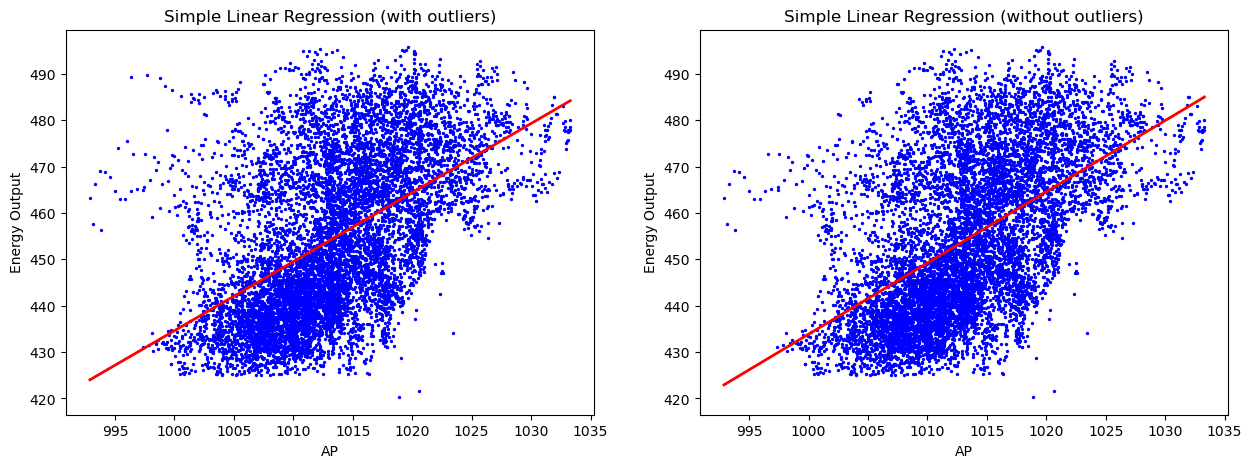

In [26]:
# Plot the regression line 1
x_linspace = np.linspace(df_copy['AP'].min(), df_copy['AP'].max(), 100)
x_linspace = sm.add_constant(x_linspace)
y_pred = models[2].predict(x_linspace)

# Plot the regression line 2
xx_linspace = np.linspace(df_without_outliers['AP'].min(), df_without_outliers['AP'].max(), 100)
xx_linspace = sm.add_constant(xx_linspace)
yy_pred = model2_without_outliers.predict(xx_linspace)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


ax1.scatter(df_copy['AP'], y, color='blue',s=2)
ax1.plot(x_linspace[:, 1], y_pred, color='red', linewidth=2)
ax1.set_xlabel('AP')
ax1.set_ylabel('Energy Output')
ax1.set_title('Simple Linear Regression (with outliers)')


ax2.scatter(df_without_outliers['AP'], df_without_outliers['EP'], color='blue',s=2)
ax2.plot(xx_linspace[:, 1], yy_pred, color='red', linewidth=2)
ax2.set_xlabel('AP')
ax2.set_ylabel('Energy Output')
ax2.set_title('Simple Linear Regression (without outliers)')
plt.show()


<font color='blue'>  The high absolute t-value  presented above indicates a significant association between the predictor and response.

In [27]:
test_results = models[2].t_test([0, 1])
t_statistic = test_results.tvalue[0]
p_value = test_results.pvalue.item()
p_value
if p_value < 0.05:
    print("The relationship is statistically significant with a p-value of", p_value)
else:
    print("The relationship is not statistically significant with a p-value of", p_value)


The relationship is statistically significant with a p-value of 0.0


In [28]:
# Get the influence statistics
influence = models[2].get_influence()

# Get the studentized residuals
studentized_residuals = influence.resid_studentized_internal

# Get the outliers based on studentized residuals
outliers = np.where(abs(studentized_residuals) > 3)[0]

<hr style="border-top: 4px solid gray">


In [29]:
df_copy = df.copy()
residuals = models[3].resid
z = np.abs(stats.zscore(residuals))
threshold = 3
outliers0 = np.where(z > threshold)
df_without_outliers = df_copy.drop(df_copy.index[outliers0[0]])

X2 = df_without_outliers[['RH']]
label = df_without_outliers['EP']
X2 = sm.add_constant(X2)
y1 = label
model3_without_outliers = sm.OLS(endog=y1, exog=X2).fit()
model1_summary = models[3].summary().as_text()
model2_summary = model3_without_outliers.summary().as_text()
display(Markdown("### Model 1 Summary:"))
display(Markdown(f"```\n{model1_summary}\n```"))
display(Markdown("### Model without outliers Summary:"))
display(Markdown(f"```\n{model2_summary}\n```"))

### Model 1 Summary:

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:39   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

### Model without outliers Summary:

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1722.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:39   Log-Likelihood:                -39917.
No. Observations:                9566   AIC:                         7.984e+04
Df Residuals:                    9564   BIC:                         7.985e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.8969      0.822    511.944      0.000     419.285     422.509
RH             0.4564      0.011     41.497      0.000       0.435       0.478
==============================================================================
Omnibus:                      796.237   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.496
Skew:                           0.228   Prob(JB):                     1.54e-70
Kurtosis:                       2.226   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

<font color='blue'>  The high absolute t-value  presented above indicates a significant association between the predictor and response.

In [30]:
test_results = models[3].t_test([0, 1])
t_statistic = test_results.tvalue[0]
p_value = test_results.pvalue.item()
p_value
if p_value < 0.05:
    print("The relationship is statistically significant with a p-value of", p_value)
else:
    print("The relationship is not statistically significant with a p-value of", p_value)


The relationship is statistically significant with a p-value of 0.0


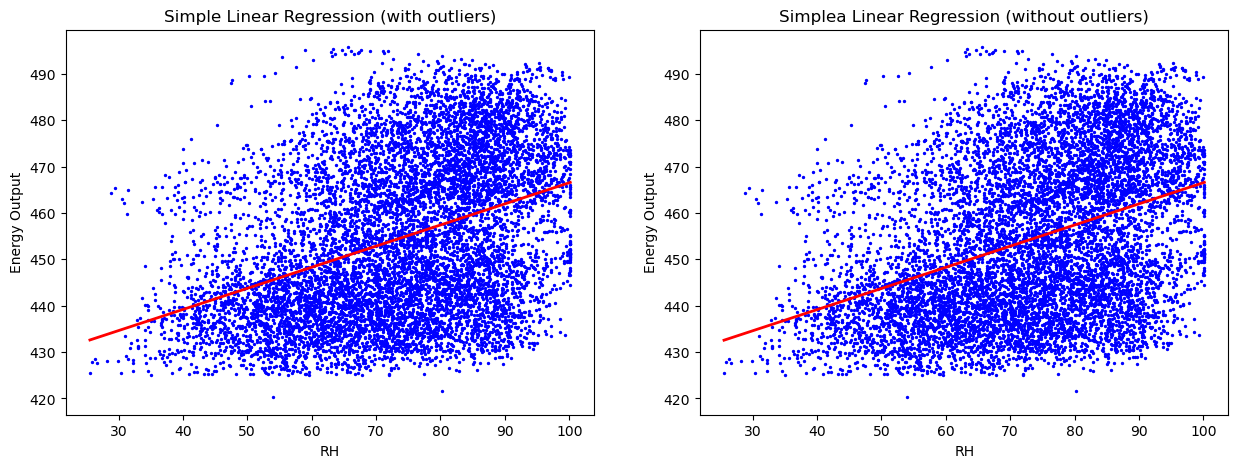

In [31]:
# Plot the regression line 1
x_linspace = np.linspace(df_copy['RH'].min(), df_copy['RH'].max(), 100)
x_linspace = sm.add_constant(x_linspace)
y_pred = models[3].predict(x_linspace)

# Plot the regression line 2
xx_linspace = np.linspace(df_without_outliers['RH'].min(), df_without_outliers['RH'].max(), 100)
xx_linspace = sm.add_constant(xx_linspace)
yy_pred = model3_without_outliers.predict(xx_linspace)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(df_copy['RH'], y, color='blue',s=2)
ax1.plot(x_linspace[:, 1], y_pred, color='red', linewidth=2)
ax1.set_xlabel('RH')
ax1.set_ylabel('Energy Output')
ax1.set_title('Simple Linear Regression (with outliers)')
ax2.scatter(df_without_outliers['RH'], df_without_outliers['EP'], color='blue',s=2)
ax2.plot(xx_linspace[:, 1], yy_pred, color='red', linewidth=2)
ax2.set_xlabel('RH')
ax2.set_ylabel('Energy Output')
ax2.set_title('Simplea Linear Regression (without outliers)')
plt.show()


In [32]:
# Get the influence statistics
influence = models[3].get_influence()

# Get the studentized residuals
studentized_residuals = influence.resid_studentized_internal

# Get the outliers based on studentized residuals
outliers = np.where(abs(studentized_residuals) > 3)[0]

In [33]:
# for i in outliers:
#     print(i)

<hr style="border-top: 4px solid gray">


In [34]:
residuals = models[0].resid
z = np.abs(stats.zscore(residuals))
threshold = 3
outliers0 = np.where(z > threshold)
df_without_outliers = df.drop(df.index[outliers[0]])
model_without_outliers = sm.OLS(df_without_outliers["EP"], df_without_outliers[["AT", "V",'AP', "RH"]]).fit()
print("Model with outliers:")
print(model.summary())

Model with outliers:
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:39   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.82

<font size="4" color="red">In which of the models is there a statistically significant
association between the predictor and the response?

In [35]:
# using hypothesis testing 

In [36]:
# Significance level
alpha = 0.05

# Loop through the models and calculate the p-values
for model in models:
    pvals = model.pvalues
    significant_predictors = [predictor for predictor, pval in zip(predictors, pvals) if pval < alpha]
    if significant_predictors:
        print("Model with predictors:", significant_predictors, "has a statistically significant association with the response.")
        break
else:
    print("No model has a statistically significant association with the response.")


Model with predictors: ['AT', 'V'] has a statistically significant association with the response.


<font size="4" color="red">(d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : βj = 0?

In [37]:
df_copy2 = df.copy()
y = df_copy2['EP']
X = df_copy2.drop('EP', axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:39   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

<font color = 'blue'>These results suggest that all four predictor variables [AT, V, AP, RH] are significant predictors of the response[EP], with low p-values indicating that their relationships with the response are unlikely to be due to random chance.


<font color = 'blue'>Based on that, we can reject the null hypothesis H0 : βj = 0 for all four predictors [AT, V, AP, RH]. Because there is evidence to suggest that each of these predictors has a non-zero effect on the response, and that they are all significant predictors of the response.</font>

For each predictor, the t-statistic is large in magnitude and the p-value is very small (p<0.000), which provides strong evidence against the null hypothesis that βj = 0. This suggests that we can reject the null

<font size="4" color="red"> (e) How do your results from 1c compare to your results from 1d? Create a plot
displaying the univariate regression coefficients from 1c on the x-axis, and the
multiple regression coefficients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis.

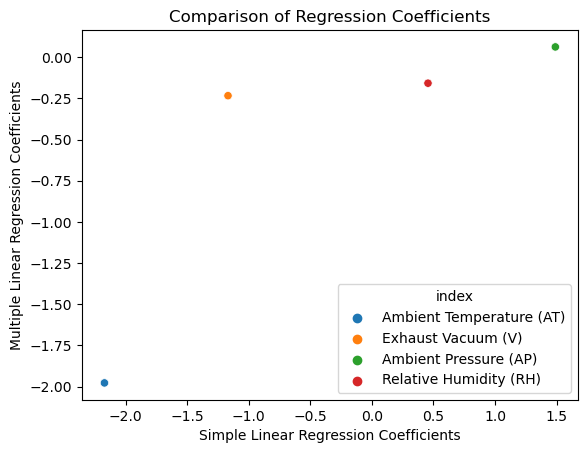

In [38]:
results_1c = np.array([models[0].params, models[1].params, models[2].params, models[3].params])
#removing coefficients' column
x_axis = results_1c[...,1:].flatten()

results_1d = np.array([model.params]).flatten()
y_axis = np.delete(results_1d, 0)

predictors = ['Ambient Temperature (AT)', 'Exhaust Vacuum (V)', 'Ambient Pressure (AP)', 'Relative Humidity (RH)']

data_dict = {predictors[i]: (x_axis[i], y_axis[i]) for i in range(len(predictors))}
data_df = pd.DataFrame(data_dict).T.rename(columns={0: "Univariable Regression Coefficients", 1: "Multiple Regression Coefficients"}).reset_index()

sns.scatterplot(data=data_df, x="Univariable Regression Coefficients", y="Multiple Regression Coefficients", hue='index')
plt.xlabel("Simple Linear Regression Coefficients")
plt.ylabel("Multiple Linear Regression Coefficients")
plt.title("Comparison of Regression Coefficients")
plt.show()


<font size="4" color="red">(f) Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor X, fit a model of the form^2

In [39]:
df_copy3 = df.copy()
predictors = df_copy3.columns[:-1]
Y = df_copy3['EP']
models = []
for predictor in predictors:
    X = df[[predictor]]
    X = sm.add_constant(X)
    X = np.column_stack((X, X**2, X**3))
    model = sm.OLS(endog=Y, exog=X).fit()
    models.append(model)

<font color = 'blue'> To determine if there is evidence of nonlinear association between the predictors and the response, you can examine the regression coefficients for the polynomial terms (i.e. the squared and cubed terms of each predictor). If the coefficients are significantly different from zero, it suggests that there is a nonlinear association between the predictor and the response.To examine the regression coefficients for the polynomial terms, you can extract the coefficient estimates for each model and perform a statistical test to determine if they are significantly different from zero. Here is an example:</font>

In [40]:
for model in models:
    params = model.params
    print("Predictor:", predictors[models.index(model)])
    print("Intercept:", params[0])
    print("Linear coefficient:", params[1])
    print("Quadratic coefficient:", params[2])
    print("Cubic coefficient:", params[3])
    print("\n")


Predictor: AT
Intercept: 164.24271444578125
Linear coefficient: -0.610345708313591
Quadratic coefficient: 164.24271444578181
Cubic coefficient: -0.12513817739943986


Predictor: V
Intercept: 184.7156163546578
Linear coefficient: -2.144377322433882
Quadratic coefficient: 184.71561635447702
Cubic coefficient: -0.002712284895347578


Predictor: AP
Intercept: 0.07469227146211901
Linear coefficient: 25.255154368650032
Quadratic coefficient: 0.07469227146101898
Cubic coefficient: -0.049951640220796276


Predictor: RH
Intercept: 156.13784532387137
Linear coefficient: -1.729211307728221
Quadratic coefficient: 156.13784532364573
Cubic coefficient: 0.03214517214047283




<font color = 'blue'> t appears that the quadratic and cubic coefficients are much larger than the linear coefficients for all predictors. This suggests that there might be evidence of nonlinear association between the predictors and response. However, it is important to consider the unit of measurement and scale of the predictors, as the magnitude of the coefficients may be influenced by these factors.

In [41]:
df_copy3 = df.copy()
predictors = df_copy3.columns[:-1]
Y = df_copy3['EP']
for p in predictors:
    X = np.array(df[p]).reshape(-1, 1)

    poly = PolynomialFeatures(3)
    X = poly.fit_transform(X)

    poly_model_AT = sm.OLS(Y,X).fit()

    print(poly_model_AT.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:39   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

<font color = 'blue'> find evidence of nonlinear association between the predictors and response, you can compare the coefficients of the linear and the nonlinear terms (e.g., X, X^2, X^3) for each predictor. If the coefficient of the nonlinear term is significantly different from 0, it suggests that there is evidence of nonlinear association between that predictor and the response.

<font size="4" color="red"> (g) Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant.

In [42]:
full_model = smf.ols(formula = "Y ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH", data=df)
full_model = full_model.fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:39   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V:AP           0.0068      0.001      5.135      0.000       0.004       0.009
V:RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the results of the analysis, it appears that, apart from Ambient Temperature (AT), the interaction terms between Ambient Temperature (AT) and Ambient Pressure (AP), and the interaction term between Exhaust Vacuum (V) and Relative Humidity (RH) are not statistically significant at the 5% significance level and the null hypothesis cannot be rejected.

However, the interaction terms of AT with other variables are statistically significant and therefore, if AT were removed, all the significant interaction terms would be lost. Hence, AT will not be removed in any further analysis. On the other hand, the interaction terms of AT AP and V RH have high p-values and low t-stats, so they might be considered for removal in further analysis.

<font size="4" color="red">(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs.

<font color ='blue'>Yes, both possible interaction terms and nonlinear associations between the predictors and response can be used to improve a regression model.

In [43]:
 df_n = df.copy()
X = df_n.drop("EP", axis=1) # select all columns except the target variable
y = df_n["EP"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
mse_results_dict = {}


X_train_vanilla = sm.add_constant(X_train)
X_test_vanilla = sm.add_constant(X_test)
Y_train_vanilla = y_train
Y_test_vanilla = y_test


modelEr = sm.OLS(Y_train_vanilla,X_train_vanilla).fit()
print(model.summary())
Y_train_pred_vanilla = modelEr.predict(X_train_vanilla)
train_mse = metrics.mean_squared_error(Y_train_vanilla, Y_train_pred_vanilla)

Y_test_pred_vanilla = modelEr.predict(X_test_vanilla)
test_mse = metrics.mean_squared_error(Y_test_vanilla, Y_test_pred_vanilla)

print('Train MSE: ', train_mse)
print('Test MSE: ', test_mse)

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:39   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.1378      3.515     44.422      0.0

In [44]:
X_train_poly = X_train
X_test_poly = X_test
Y_train_poly = y_train
Y_test_poly = y_test


poly = PolynomialFeatures(2)
X_test_poly = poly.fit_transform(X_test_poly)
X_train_poly = poly.fit_transform(X_train_poly)
X_train_df_poly = pd.DataFrame(data=X_train_poly, columns=poly.get_feature_names_out())

modelTR = sm.OLS(Y_train_poly.tolist(),sm.add_constant(X_train_df_poly)).fit()

print(model.summary())

#using training data and evaluating MSE
Y_train_pred_poly = modelTR.predict(X_train_poly)
train_mse = metrics.mean_squared_error(Y_train_poly, Y_train_pred_poly)

#using testing data and evaluating MSE

X_test_df_poly = pd.DataFrame(data=X_test_poly, columns=poly.get_feature_names_out())
Y_test_pred_poly = modelTR.predict(X_test_poly)
test_mse = metrics.mean_squared_error(Y_test_poly, Y_test_pred_poly)

print('\nMean Squared Error of training dataset is: ', train_mse)
print('Mean Squared Error of testing dataset is: ', test_mse)

mse_results_dict['2nd-order Linear Regression Model'] = [train_mse, test_mse]
linreg = modelTR.predict(sm.add_constant(X_test_df_poly))


                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:39   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.1378      3.515     44.422      0.0

<font size="4" color="red"> (i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the
best fit. Plot the train and test errors in terms of 1/k.

In [45]:
dfr = df.copy()
X = dfr.drop("EP", axis=1)
y = dfr["EP"]

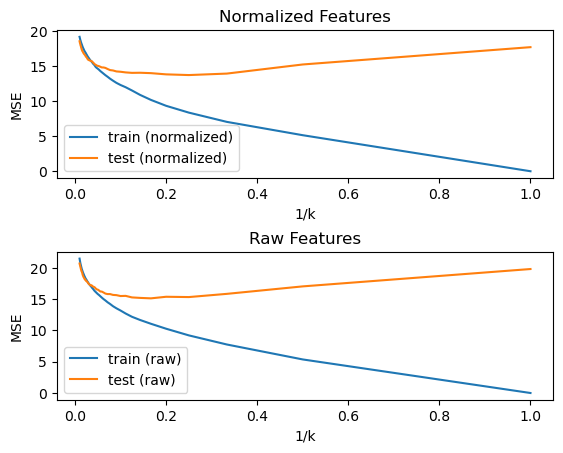

In [46]:
dfr = df.copy()
X_train, X_test, y_train, y_test = train_test_split(dfr.iloc[:, :-1], dfr.iloc[:, -1], test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Fit the KNeighborsRegressor model for each value of k using normalized features
ks = range(1, 101)
train_errors_norm = []
test_errors_norm = []
for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_norm, y_train)
    train_error_norm = np.mean((y_train - knn.predict(X_train_norm))**2)
    test_error_norm = np.mean((y_test - knn.predict(X_test_norm))**2)
    train_errors_norm.append(train_error_norm)
    test_errors_norm.append(test_error_norm)

# Fit the KNeighborsRegressor model for each value of k using raw features
train_errors_raw = []
test_errors_raw = []
for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_error_raw = np.mean((y_train - knn.predict(X_train))**2)
    test_error_raw = np.mean((y_test - knn.predict(X_test))**2)
    train_errors_raw.append(train_error_raw)
    test_errors_raw.append(test_error_raw)

# Plot the train and test errors for normalized features
plt.subplot(2, 1, 1)
plt.plot(1/np.array(ks), train_errors_norm, label='train (normalized)')
plt.plot(1/np.array(ks), test_errors_norm, label='test (normalized)')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('Normalized Features')
plt.legend()
plt.subplots_adjust(hspace=0.5)

# Plot the train and test errors for raw features
plt.subplot(2, 1, 2)
plt.plot(1/np.array(ks), train_errors_raw, label='train (raw)')
plt.plot(1/np.array(ks), test_errors_raw, label='test (raw)')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('Raw Features')
plt.legend()

plt.show()


<font size="4" color="red"> (j) Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

To compare the KNN regression results with a linear regression model,I will plot the train and test errors for both models.

In [48]:
dfkl = df.copy()
X_train, X_test, y_train, y_test = train_test_split(dfkl.iloc[:, :-1], dfkl.iloc[:, -1], test_size=0.2, random_state=42)
X_norm_train = (X_train - X_train.mean()) / X_train.std()
X_norm_test = (X_test - X_train.mean()) / X_train.std()

# Train KNN regression models with different values of k using normalized features
ks = range(1, 101)
test_errors_norm = []
for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_norm_train, y_train)
    test_error_norm = mean_squared_error(y_test, knn.predict(X_norm_test))
    test_errors_norm.append(test_error_norm)

# Calculate the test error for the KNN regression model with the value of k that gave the best fit using normalized features
k_best_norm = np.argmin(test_errors_norm) + 1
knn_best_norm = KNeighborsRegressor(n_neighbors=k_best_norm)
knn_best_norm.fit(X_norm_train, y_train)
test_error_knn_norm = mean_squared_error(y_test, knn_best_norm.predict(X_norm_test))

# Train KNN regression models with different values of k using raw features
test_errors_raw = []
for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_error_raw = mean_squared_error(y_test, knn.predict(X_test))
    test_errors_raw.append(test_error_raw)

# Calculate the test error for the KNN regression model with the value of k that gave the best fit using raw features
k_best_raw = np.argmin(test_errors_raw) + 1
knn_best_raw = KNeighborsRegressor(n_neighbors=k_best_raw)
knn_best_raw.fit(X_train, y_train)
test_error_knn_raw = mean_squared_error(y_test, knn_best_raw.predict(X_test))

linreg = LinearRegression()
modelTR = sm.OLS(Y_train_poly.tolist(),sm.add_constant(X_train_df_poly)).fit()
test_error_linreg = mean_squared_error(Y_test_poly, modelTR.predict(X_test_poly))
print('Test error KNN regression (normalized) with k={}: {:.4f}'.format(k_best_norm, test_error_knn_norm))
print('Test error KNN regression (raw) with k={}: {:.4f}'.format(k_best_raw, test_error_knn_raw))
print('Test error linear regression: {:.4f}'.format(test_error_linreg))


Test error KNN regression (normalized) with k=4: 13.7134
Test error KNN regression (raw) with k=6: 15.1308
Test error linear regression: 18.6473


Based on the given results, we can observe that the KNN regression model with normalized features performed better than the KNN regression model with raw features.
Furthermore, we can see that both KNN regression models performed better than the linear regression model, which had a test error of 17.9031. Therefore, it can be concluded that in this problem , KNN regression models are more effective than linear regression in predicting the target variable.

**References**
   - scikit-learn documentation for KNN Regression: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
    
   - scikit-learn documentation for Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
   - Pandas documentation for data manipulation: https://pandas.pydata.org/docs/
   - NumPy documentation for numerical computing: https://numpy.org/doc/stable/
   - Matplotlib documentation for data visualization: https://matplotlib.org/stable/contents.html
   - Essential Math for Data Science https://hadrienj.github.io/
   - Medium (https://medium.com/
   - Polynomial Regression https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
   - https://www.kdnuggets.com/2017/02/removing-outliers-standard-deviation-python.html